In [1]:
# Download data from here : https://www.dropbox.com/sh/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla?dl=0
import os
import numpy as np
import pandas as pd
import sys
os.chdir('/Users/vivekkathula/Dropbox/P3 Quora Text Classification with embeddings/')

In [2]:
os.listdir()  #Shows the files in the folder

['.DS_Store', 'glove.840B.300d.txt', 'train.csv']

In [3]:
qu = pd.read_csv('train.csv')  # converting the CSV file into data frame

In [4]:
qu.head(), qu.shape

(                    qid                                      question_text  \
 0  00002165364db923c7e6  How did Quebec nationalists see their province...   
 1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   
 2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
 3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
 4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   
 
    target  
 0       0  
 1       0  
 2       0  
 3       0  
 4       0  , (1306122, 3))

In [5]:
questions=qu['question_text']
type(questions),len(questions),questions[0]

(pandas.core.series.Series,
 1306122,
 'How did Quebec nationalists see their province as a nation in the 1960s?')

In [6]:
tokens = list(map(lambda x:set(x.split(" ")),questions))   # similar to relu activation function

In [7]:
len(tokens), tokens[0] #we now know total rows are 1,306122, 

(1306122,
 {'1960s?',
  'How',
  'Quebec',
  'a',
  'as',
  'did',
  'in',
  'nation',
  'nationalists',
  'province',
  'see',
  'the',
  'their'})

In [8]:
type(tokens)            #list,
type(tokens[0])         #set

set

In [9]:
x=0
for i in range(1306122): #we already know total rows are 1,306122 from earlier test
    x=x+len(list(tokens[i]))
x
#tokens[i]is set(), so we convert it to list, so total words used are 1,5850723

15850723

In [10]:
i=0
vocab = set()
others=set()
for sent in tokens:
    for word in sent:
        i=i+1
        if(len(word)>0):
            vocab.add(word)
        else:
             others.add(word)   
vocab = list(vocab)
others=list(others)#just a no-space, sum of no spaces is nospace
i,len(vocab),i-len(vocab)

#In our earlier line, we got total words as 15850723, but vocab has only 509309 words, so why the difference

(15850723, 509039, 15341684)

In [11]:
others[0:15341684] # as you can see the difference is nospace "", we have to remove them while numbering words

['']

In [12]:
import numpy as np
len(vocab),vocab[0],len(tokens[0])

(509039, '2000ghc?', 13)

In [13]:
word2index = {}#dictionary to give a number to each word in our vocabulary
for i,word in enumerate(vocab):
    word2index[word]=i

In [14]:
input_dataset = list()
for sent in tokens:
    sent_indices = list()
    for word in sent:
        try:
            sent_indices.append(word2index[word])
        except:
            "" # we saw these in others
    input_dataset.append(list(set(sent_indices)))

In [15]:
target_dataset = qu['target'] #target is already 1/0's so we dont have to convert them. 

In [16]:
len(target_dataset), len(target_dataset)*0.9, len(target_dataset)-len(target_dataset)*0.9

(1306122, 1175509.8, 130612.19999999995)

In [17]:
len(input_dataset),len(target_dataset)

(1306122, 1306122)

In [18]:
import numpy as np 
np.random.seed(1)
def sigmoid(x):
    return 1/(1+np.exp(-x))

alpha, iterations= (0.01, 2)
hidden_size = 100
weights_0_1 = 0.2*np.random.random((len(vocab),hidden_size)) - 0.1 # shape is (509039, 100)
weights_1_2 = 0.2*np.random.random((hidden_size,1)) - 0.1  # shape is (100, 1)

In [19]:
#I was all shapes by keeping iterations very less
alpha, iterations = (0.01, 3)
hidden_size = 100
z=0
#print('weights_0_1 '+str(weights_0_1.shape))
#print('weights_1_2 '+str(weights_1_2.shape))
#print("")
correct,total = (0,0)

for iter in range(iterations):
    for i in range(len(input_dataset)-130612):
        x,y = input_dataset[i],target_dataset[i] # x has 13 word in i=0, and keep changing, while y is 0/1
        #print('length of x '+ str(len(x)))
        #print(y)
        #print('weights_0_1[x] '+str(weights_0_1[x].shape)) 
        #z=np.sum(weights_0_1[x])
        #print('np.sum(weights_0_1[x] '+str(z.shape))
        layer_1 = sigmoid(np.sum(weights_0_1[x],axis=0)) # w1 shape becomes (13, 100) &changes wit iter, l1 is (100,)
        #print('layer_1 '+str(layer_1.shape))
        layer_2 = sigmoid(np.dot(layer_1,weights_1_2))# w2 is (100, 1) changes, l2 is (1,)
        #print('layer_2 '+str(layer_2.shape))
        layer_2_delta = layer_2 - y   # shape is (1,)
        #print('layer_2_delta '+str(layer_2_delta.shape))
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)  #shape is (100,)
        #print('layer_1_delta '+str(layer_1_delta.shape))
        weights_0_1[x] -= layer_1_delta * alpha # shape of W1 now adjust back to original (509039, 100)
        #print('new weights_0_1 '+str(weights_0_1.shape))
        weights_1_2 -= np.outer(layer_1,layer_2_delta) * alpha # shape is (100, 1)
        #print('new_weights_1_2 '+str(weights_1_2.shape))
        if(np.abs(layer_2_delta) < 0.5): 
            correct += 1
        total += 1
        #print("")
        if(i % 10 == 9):
            progress = str(i/float(len(input_dataset))) 
            sys.stdout.write('\rIter:'+str(iter)
                             +' Progress:'+progress[2:4] +'.'+progress[4:6]
                             +'% Training Accuracy:'+ str(correct/float(total)) + '%')
    print()


Iter:0 Progress:89.99% Training Accuracy:0.9491812064550705%
Iter:1 Progress:89.99% Training Accuracy:0.9511131338738079%
Iter:2 Progress:89.99% Training Accuracy:0.9521161027979345%


In [20]:
#Accuracy is rights/total it is used here
pred= list()
true=list()
correct,total = (0,0)
for i in range(len(input_dataset)-130612,len(input_dataset)):
    x = input_dataset[i] 
    y = target_dataset[i]
    true.append(y)
    layer_1 = sigmoid(np.sum(weights_0_1[x],axis=0)) 
    layer_2 = sigmoid(np.dot(layer_1,weights_1_2))
    pred.append(layer_2)
    if(np.abs(layer_2 - y) < 0.5): correct += 1
    total += 1
print("Test Accuracy:" + str(correct / float(total)))

Test Accuracy:0.9508161577802958


In [21]:
#This is other common metric to know accuracy, so I tried this too to check 
from sklearn.metrics import roc_auc_score
roc_auc_score(true,pred)

0.9417972838205579

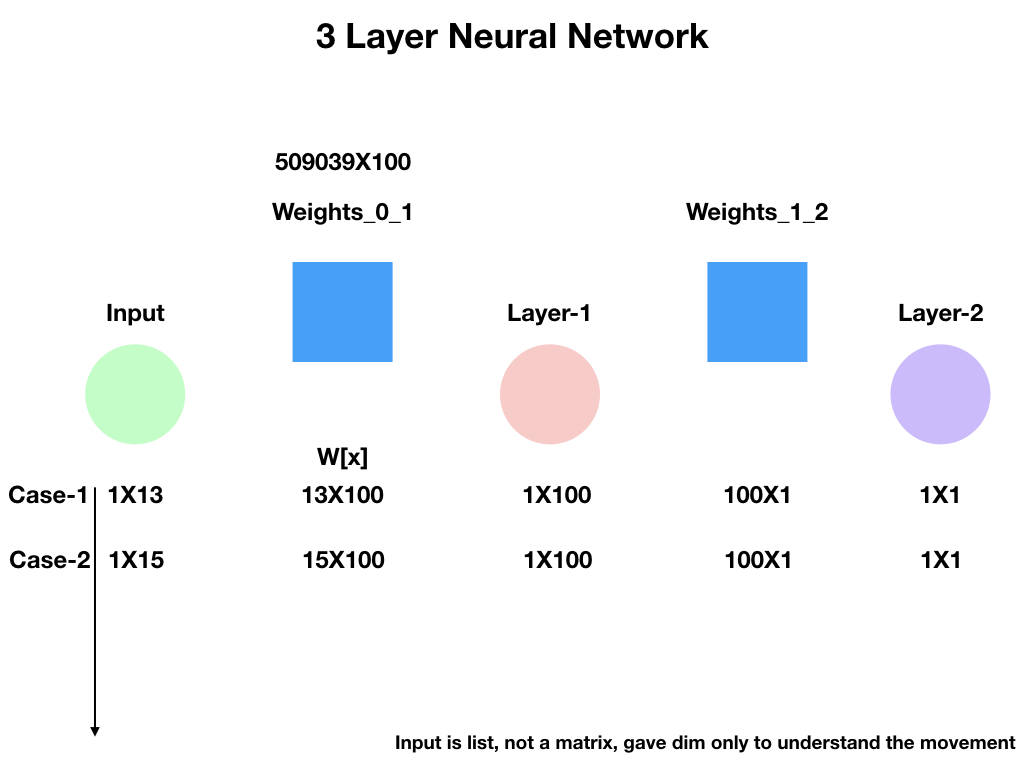

In [22]:
import os
from PIL import Image
os.chdir('/Users/vivekkathula/Desktop/Github/Edvancer/Deep learning/Project_3_Spam filter for Quora questions/')
img1 = Image.open ('P3 Neural Network.001.jpeg');
img1